In [23]:
import pandas as pd

salaries = pd.read_csv("salaries.csv")
points = pd.read_csv("points.csv")
df = pd.merge(salaries, points, on=["season", "Squad"])

df

,adj_gross_gbp,annual_gross_gbp,club_code,defense_gbp,forward_gbp,keeper_gbp,midfield_gbp,Squad,weekly_gross_gbp,season,MP,W,D,L,GF,GA,GD,Pts
0,147132001,113952000,MCI,40996000,23920000,5616000,43420000,Manchester City,2191385,2013-2014,38,27,5,6,102,37,65,86
1,135743836,105132000,CHE,31980000,42836000,7124000,23192000,Chelsea,2021769,2013-2014,38,25,7,6,71,27,44,82
2,125621023,97292000,MUN,33462000,31694000,6656000,25480000,Manchester United,1871000,2013-2014,38,19,7,12,64,43,21,64
3,95121913,73670800,ARS,16445000,17368000,4492000,35365800,Arsenal,1416746,2013-2014,38,24,7,7,68,41,27,79
4,84652806,65562600,LIV,25033800,20384000,3380000,16764800,Liverpool,1260819,2013-2014,38,26,6,6,101,50,51,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,64142000,64142000,NTG,21164000,20722000,3120000,19136000,Nottingham Forest,1233500,2024-2025,38,19,8,11,58,46,12,65
236,54132000,54132000,SOU,16666000,17186000,9100000,11180000,Southampton,1041000,2024-2025,38,2,6,30,26,86,-60,12
237,53898000,53898000,BOU,14352000,21190000,4316000,14040000,Bournemouth,1036500,2024-2025,38,15,11,12,58,46,12,56
238,44863000,44863000,BTD,17537000,15860000,2600000,8866000,Brentford,862750,2024-2025,38,16,8,14,66,57,9,56


Slope (coefficient): 0.2439
Intercept: 30.7490
R-squared: 0.4635


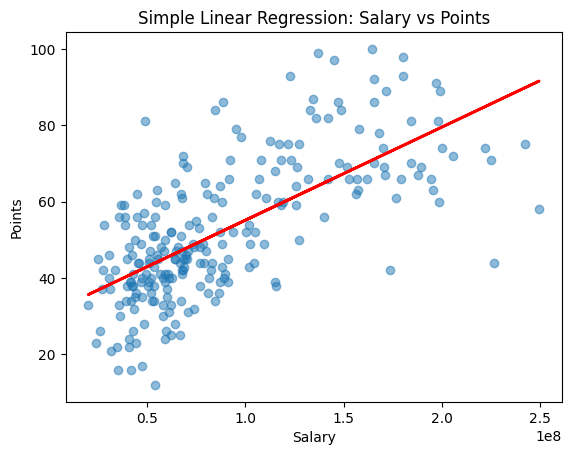

In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#df = df[df["season"] != '2024-2025']

# Assuming you have your merged dataframe 'df'
X = df[['adj_gross_gbp']]  
X_scaled = df[['adj_gross_gbp']] / 1_000_000
y = df['Pts']

# Create and fit the model
model = LinearRegression()
model.fit(X_scaled, y)

# Make predictions
predictions = model.predict(X_scaled)

# See the results
print(f"Slope (coefficient): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"R-squared: {model.score(X_scaled, y):.4f}")

# Plot it
plt.scatter(X, y, alpha=0.5)
plt.plot(X, predictions, color='red', linewidth=2)
plt.xlabel('Salary')
plt.ylabel('Points')
plt.title('Simple Linear Regression: Salary vs Points')
plt.show()

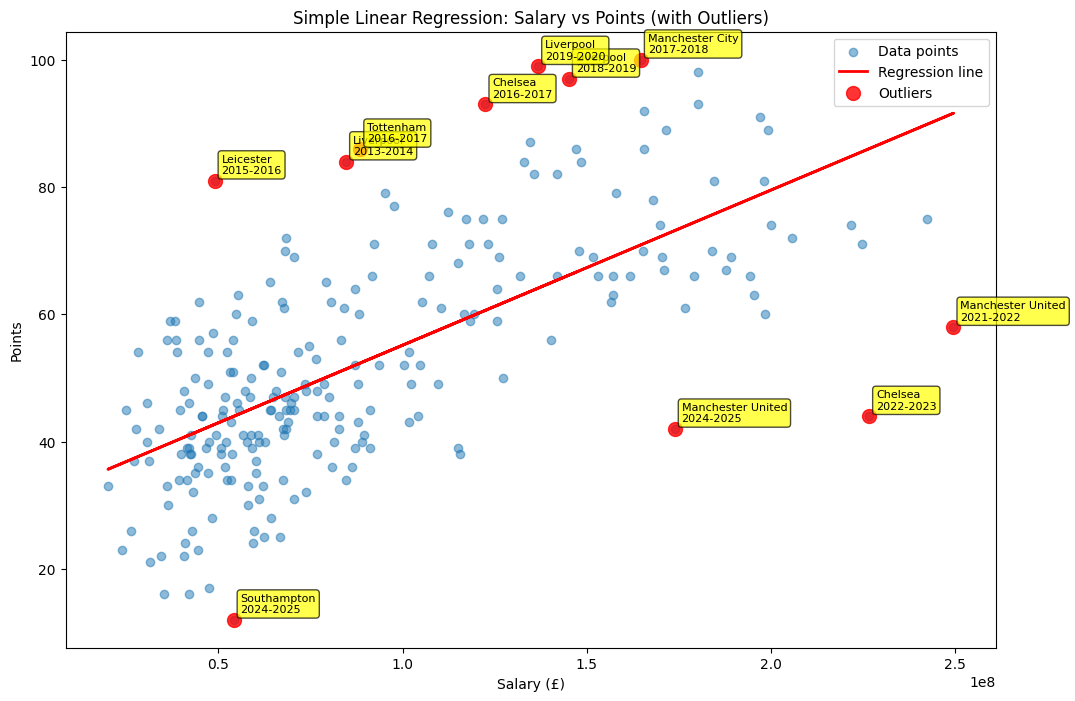

Extreme Outliers:
            Squad    season  adj_gross_gbp  Pts  predicted_pts   residual
        Liverpool 2013-2014       84652806   84      51.395868  32.604132
        Leicester 2015-2016       48968291   81      42.692380  38.307620
          Chelsea 2016-2017      122462245   93      60.617627  32.382373
        Tottenham 2016-2017       88494848   86      52.332946  33.667054
  Manchester City 2017-2018      164630434  100      70.902488  29.097512
        Liverpool 2018-2019      145100067   97      66.139013  30.860987
        Liverpool 2019-2020      136766458   99      64.106438  34.893562
Manchester United 2021-2022      249449352   58      91.589904 -33.589904
          Chelsea 2022-2023      226564000   44      86.008145 -42.008145
Manchester United 2024-2025      173823000   42      73.144564 -31.144564
      Southampton 2024-2025       54132000   12      43.951814 -31.951814

All Residuals:
            Squad    season  adj_gross_gbp  Pts  predicted_pts   residual  abs

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Your existing model code
X = df[['adj_gross_gbp']]  
y = df['Pts']
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

# Calculate residuals (actual - predicted)
residuals = y - predictions

# Define outliers (you can adjust these thresholds)
residual_threshold = 2 * np.std(residuals)  # 2 standard deviations
outliers = np.abs(residuals) > residual_threshold

# Create the plot
plt.figure(figsize=(12, 8))
plt.scatter(X, y, alpha=0.5, label='Data points')
plt.plot(X, predictions, color='red', linewidth=2, label='Regression line')

# Highlight and label outliers
outlier_x = X[outliers]
outlier_y = y[outliers]
plt.scatter(outlier_x, outlier_y, color='red', s=100, alpha=0.8, label='Outliers')

# Add labels for outliers
for i, (idx, is_outlier) in enumerate(outliers.items()):
    if is_outlier:
        squad = df.loc[idx, 'Squad']
        season = df.loc[idx, 'season']
        plt.annotate(f'{squad}\n{season}', 
                    (X.iloc[i].values[0], y.iloc[i]), 
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=8, ha='left',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

plt.xlabel('Salary (£)')
plt.ylabel('Points')
plt.title('Simple Linear Regression: Salary vs Points (with Outliers)')
plt.legend()
plt.show()

# Print outlier details
print("Extreme Outliers:")
print("="*50)
outlier_data = df[outliers][['Squad', 'season', 'adj_gross_gbp', 'Pts']].copy()
outlier_data['predicted_pts'] = predictions[outliers]
outlier_data['residual'] = residuals[outliers]
print(outlier_data.to_string(index=False))

# Print ALL residuals
print("\nAll Residuals:")
print("="*50)
all_residuals = df[['Squad', 'season', 'adj_gross_gbp', 'Pts']].copy()
all_residuals['predicted_pts'] = predictions
all_residuals['residual'] = residuals
all_residuals['abs_residual'] = np.abs(residuals)

# Sort by absolute residual (largest first) to see biggest over/under performers
all_residuals_sorted = all_residuals.sort_values('abs_residual', ascending=False)
print(all_residuals_sorted.to_string(index=False))